# 선형 회귀 기반 분류 알고리즘 - LogisticRegression

-	이진분류 및 다중분류 가능
-	분류지만 선형회귀식 기반의 알고리즘이라서 Regresion

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

[1] 데이터 준비 및 확인

In [3]:
data = '../Data/iris.csv'

In [4]:
irisDF = pd.read_csv(data)

In [5]:
irisDF.head(15)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


# 2개 품종만 추출

In [6]:
irisDF.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [7]:
irisDF.shape

(150, 5)

In [8]:
dataDF = irisDF[irisDF.variety != 'Virginica'].copy()
dataDF.shape

(100, 5)

* 2개 품종 식별 가능한 피쳐 선택

In [9]:
SETO = dataDF['variety'] == 'Setos'
VESI = dataDF['variety'] == 'Versicolor'

In [10]:
dataDF[SETO]['petal.length']
dataDF[VESI]['petal.length']

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal.length, dtype: float64

* 꽃잎의 길이와 너비(petal.length, petal.width) 특성만 추출

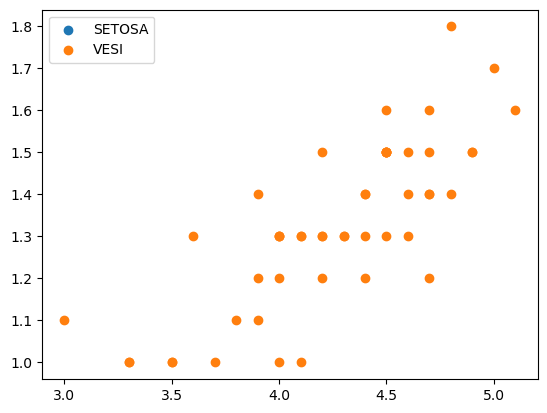

In [11]:
plt.scatter(dataDF[SETO]['petal.length'],dataDF[SETO]['petal.width'], label = 'SETOSA')
plt.scatter(dataDF[VESI]['petal.length'],dataDF[VESI]['petal.width'], label = 'VESI')

plt.legend()
plt.show()

In [12]:
dataDF.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [13]:
dataDF=dataDF[dataDF.columns[2:]].copy()

In [14]:
dataDF.shape

(100, 3)

In [15]:
dataDF.head(3)

,petal.length,petal.width,variety
0,1.4,0.2,Setosa
1,1.4,0.2,Setosa
2,1.3,0.2,Setosa


In [16]:
#품종 컬럼 문자열 ==> 수치형 변환
pd.set_option('future.no_silent_downcasting', True)
labelToNum={'Setosa' : 0, 'Versicolor':1}
dataDF['variety_no']=dataDF.variety.replace(labelToNum )

In [17]:
dataDF.corr(numeric_only=True)

,petal.length,petal.width
petal.length,1.000000,0.979322
petal.width,0.979322,1.000000


[2] 데이터 가공
-	피쳐/특성/독립과 타겟/클래스/종속변수분리

In [18]:
dataDF.columns

Index(['petal.length', 'petal.width', 'variety', 'variety_no'], dtype='object')

In [19]:
featureDF = dataDF[dataDF.columns[:2]]
classDF = dataDF.variety_no

In [20]:
classDF = classDF.astype('int')
classDF

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: variety_no, Length: 100, dtype: int64

In [21]:
print(f'featureDF : {featureDF.shape}  classDF : {classDF.shape}')

featureDF : (100, 2)  classDF : (100,)


In [22]:
train_X, test_X, train_y, test_y = train_test_split(featureDF, classDF,
                                                    random_state=7,
                                                    test_size=0.2,
                                                    stratify=classDF)

In [23]:
print(f'[Train_X] {train_X.shape}, [Train_y] {train_y.shape}')
print(f'[Test_X] {test_X.shape}, [test_y] {test_y.shape}')

[Train_X] (80, 2), [Train_y] (80,)
[Test_X] (20, 2), [test_y] (20,)


In [24]:
# 데이터셋 별로 클래스 갯수 확인
test_y.value_counts(), train_y.value_counts()

(variety_no
 1    10
 0    10
 Name: count, dtype: int64,
 variety_no
 1    40
 0    40
 Name: count, dtype: int64)

-	특성/피쳐 2개에 대한 스케일링 진행
-	특성/피쳐 2개에 대한 스케일링 ==> 피쳐의 값의 범위 일치

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [26]:
# StandardScaler : 평균 0, 표준편차 1 즉, 정규분포 따르도록 스케일링
# 훈련용 DS기반의 스케일러는 테스트용 DS, 사용자 데이터에 대해 스케일링 진행함
scaler = StandardScaler()

scaler.fit(train_X)

# train_X 에 대해 평균과 표준편차를 계산
# => 이후 데이터에 대해 적용할 스케일링 

StandardScaler()

In [27]:
# fit () 후에 설정되는 파라미터들 ==> 모델 파라미터
print(scaler.var_, scaler.mean_)


# var_ 는 각 특성(컬럼)의 분산을 저장
# 분산은 데이터 값들이 평균값에서 얼마나 퍼져 있는지를 나타내는 지표

# mean_는 각 특성(컬럼)의 평균값을 저장. 
# StandardScaler는 각 특성의 평균을 0으로 맞추기 위해 데이터를 변환합니다.

[2.12549375 0.32415   ] [2.8725 0.79  ]


In [28]:
# 훈련데이터와 테스트 데이터 스케일링 진행
# ==> 훈련용 생성한 스케일러로 훈련용, 테스트용 변환 진행 
# ==> 향후 임의의 새로운 데이터 예측(predict)시에도 해당 스케일러 적용
train_scaled_X = scaler.transform(train_X)
test_scaled_X = scaler.transform(test_X)

[3] 학습
-	메인학습 : 지도학습 -분류
-	세부학습 : 선형모델 로지스틱 회귀

In [29]:
# 학습모델 객체
logR=LogisticRegression()

In [30]:
# 학습 진행 ==> 훈련용 데이터 진행 fit(2D, 1D)
logR.fit(train_scaled_X, train_y)

LogisticRegression()

In [31]:
# 피쳐 갯수 만큼 존재함. 피쳐*coef_
# 절편
logR.coef_ , logR.intercept_ 


(array([[2.03218022, 1.8833978 ]]), array([0.25012681]))

#### [4] 성능평가
- 이유 : 모델이 제대로 잘 만들어 졌는지 확인
- 과대적합/과소적합 체크
    * 과대적합/과적합/오버피팅(Overfitting) : 훈련 점수 > 테스트 점수
    * 과소적합/언더피팅(Underfitting) : 훈련과 테스트 점수 모두 낮음
    * 최적적합 : 훈련 점수와 테스트 점수 비슷 높은 점수 

- 점수 : 정확도(accuary_score)

In [32]:
train_score=logR.score(train_scaled_X, train_y)
test_score= logR.score(test_scaled_X, test_y)

In [33]:
print(f'train_score : {train_score}, test_score  : {test_score}')

train_score : 1.0, test_score  : 1.0


- 분류용 성능지표 ==>  sklearn.metrics 모듈

<pre>
* 정밀도 (precision) : 모델(예측값) 기준에서 양성/Positive를 제대로 예측한 비율
* 재현율 (Recall) : 정답기준에서 양성 / Positive 를 제대로 예측한 비율
* F1-score : 정밀도와 재현율의 조합합 계산법 <== 일반적인 경우 대부분 분류 성능지표로 사용
* 정확도(Accuracy) : 정답을 맞춘 비율 <= 불균형 데이터셋에 신뢰성 떨어짐
* 오차행렬 (Confusion_matrix) : 2진 분류에서 정답과 예측에 대한 평가표
</pre>

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
# 테스트 데이터기반으로 예측값 추출
y_pred=logR.predict(test_scaled_X)

y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0])

- [정밀도 점수]

In [36]:
print(precision_score(test_y,y_pred))
print(recall_score(test_y,y_pred))
print(f1_score(test_y,y_pred))
print(confusion_matrix(test_y,y_pred))
print(classification_report(test_y,y_pred))


1.0
1.0
1.0
[[10  0]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



-	오차확인 : 손실/비용함수 => 알고리즘 마다 다름 log_loss()

In [37]:
from sklearn.metrics import log_loss

In [ ]:
np.set_printoptions(precision=10, suppress=True)

-	[분류 예측 손실계산 함수 관련]

In [39]:
# y = 1 일때 오차, y=0 일때 오차 계산 ==> 손실/비용계산
# 에측 확률값 추출 메서드 : predict_proba()

y_pred_proba = logR.predict_proba(test_scaled_X)

# 정답 1 : 예측확률값, 정답 0 :예측확률값을 뺀 오차 계산

loss = log_loss(test_y,y_pred_proba) 

# => log_loss() 함수에 정답과 예측확률값을 전달해야 함


print(f'loss : {loss :.6f}')


loss : 0.051602


# 모듈로딩 교차검증

In [40]:
# 모듈로딩

from sklearn.model_selection import cross_validate

In [41]:
# 모델객체, 훈련데이터, 타겟데이터

result = cross_validate(logR, train_scaled_X, train_y)

# 결과 result => dict 형태

for key, value in result.items(): print(key, value)

fit_time [0.00287223 0.00100946 0.00281835 0.00298452 0.00311255]
score_time [0.         0.00100112 0.00052881 0.00113249 0.0014205 ]
test_score [1. 1. 1. 1. 1.]


In [42]:
# 모델객체, 훈련데이터, 타겟데이터 , 훈련결과, 최고의 모델 
result2= cross_validate(logR, train_scaled_X, train_y, 
                        return_estimator=True, 
                        return_train_score=True)

In [43]:
for key, value in result2.items(): print(key, value)

fit_time [0.0020802  0.00102878 0.00198364 0.00114298 0.00102353]
score_time [0.00064921 0.         0.         0.00101733 0.00101233]
estimator [LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression()]
test_score [1. 1. 1. 1. 1.]
train_score [1. 1. 1. 1. 1.]


In [44]:
# test_score와 train_score 값 비교해서 과대적합/과적합/오버피팅이 되지 않은
# 가장 좋음 모델 선택 후 추출
best_estimator=result2['estimator'][2]

In [46]:
featureDF[:1]

,petal.length,petal.width
0,1.4,0.2


In [48]:
new_data = pd.DataFrame([[1.4, 0.8]], columns=featureDF.columns)
new_data_ = scaler.transform(new_data)

print(best_estimator.predict(new_data_))
print(best_estimator.predict_proba(new_data_))

[0]
[[0.84905842 0.15094158]]
